In [71]:
# used fot preprocessing the data.
import pandas as pd
# Used fo visualization of data using various graph.
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [72]:
df = pd.read_excel("/content/spam.xlsx")

In [73]:
# To Display the count of rows.
df.shape[0]

4601

In [74]:
#To display the top 10 rows.
df.head(10)

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.000,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.000,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.000,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.000,0.263,0.000,0.00,1.428,4,20,spam
5,0.00,0.00,0.27,0.0,0.81,0.81,0.00,2.98,0.54,0.81,...,0.000,0.040,0.000,0.565,0.121,0.00,1.617,18,131,spam
6,0.00,0.46,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.155,0.000,0.000,0.000,0.00,2.982,28,167,ham
7,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.138,0.000,0.000,0.00,1.228,4,43,ham
8,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.377,0.000,0.125,0.000,0.00,2.925,27,158,ham
9,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.00,4.333,11,13,ham


In [75]:
# To verify if there are any null missing values.
df.isna().sum()

make          0
address       0
all           0
3d            0
our           0
over          0
remove        0
internet      0
order         0
mail          0
receive       0
will          0
people        0
report        0
addresses     0
free          0
business      0
email         0
you           0
credit        0
your          0
font          0
0             0
money         0
hp            0
hpl           0
george        0
650           0
lab           0
labs          0
telnet        0
857           0
data          0
415           0
85            0
technology    0
1999          0
parts         0
pm            0
direct        0
cs            0
meeting       0
original      0
project       0
re            0
edu           0
table         0
conference    0
semicol       0
paren         0
bracket       0
bang          0
dollar        0
pound         0
cap_avg       0
cap_long      0
cap_total     0
Class         0
dtype: int64

<Axes: xlabel='count', ylabel='Class'>

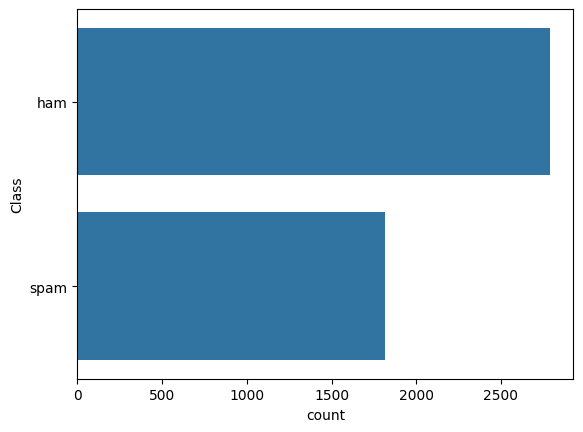

In [76]:
# To Check the distribution of target variable.
sns.countplot(df['Class'])

In [77]:
# Replacing the categorical variables to binary variables.
df['Class']=df["Class"].replace({"ham":0,"spam":1})
df

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,0
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,0
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,0
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.101,0.0,0.000,0.000,0.00,1.857,16,52,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.443,0.0,0.221,0.665,0.00,3.812,15,61,1
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.000,1,3,0
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.218,0.0,0.218,0.000,0.00,1.687,10,27,0


In [78]:
# Dividing the data as per independent
x=df.drop(columns=["Class"],axis=1)

In [79]:
# Seperate the target variable.
y=df["Class"].values

In [80]:
# Splitting the data as per the test_size = 0.78 which considers the 1012 rows for training data.
# 4601 Rows, 1012 as Training and 3589 as Testing data.
# Random state is a parameter used to control the randomness of a sample. The model will always provide a same results if it has a definite value of random state, and if it has been same training data and same hyperparameters.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=1000,random_state=44)

In [81]:
# To display the train data and test data.
print(x_train.shape[0])
print(x_test.shape[0])

1000
3601


In [82]:
print(y_train)

[0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1
 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1
 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1
 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 

In [83]:
print(df.dtypes)

make          float64
address       float64
all           float64
3d            float64
our           float64
over          float64
remove        float64
internet      float64
order         float64
mail          float64
receive       float64
will          float64
people        float64
report        float64
addresses     float64
free          float64
business      float64
email         float64
you           float64
credit        float64
your          float64
font          float64
0             float64
money         float64
hp            float64
hpl           float64
george        float64
650           float64
lab           float64
labs          float64
telnet        float64
857           float64
data          float64
415           float64
85            float64
technology    float64
1999          float64
parts         float64
pm            float64
direct        float64
cs            float64
meeting       float64
original      float64
project       float64
re            float64
edu       

In [84]:
#let's first visualize the tree on the data with just criterion='entropy.'
x_train.columns = x_train.columns.astype(str)
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [85]:
import sklearn
print(sklearn.__version__)

1.2.2


In [86]:
print(x_test)

      make  address   all   3d   our  over  remove  internet  order  mail  \
2835  0.17     0.00  0.17  0.0  1.47  0.35    0.00      0.05   0.05  0.05   
644   0.25     0.00  0.25  0.0  0.00  0.00    0.25      0.00   0.77  1.55   
3898  0.31     0.00  0.63  0.0  0.47  0.47    0.15      0.79   0.15  0.63   
3911  0.00     0.00  0.00  0.0  0.00  0.00    0.45      0.91   0.45  0.91   
809   0.00     0.00  0.00  0.0  0.33  0.00    0.00      0.00   0.00  0.66   
...    ...      ...   ...  ...   ...   ...     ...       ...    ...   ...   
1676  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
1952  0.00     1.17  0.00  0.0  0.00  0.00    0.00      0.00   1.17  0.00   
732   0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
1013  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
2665  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   

      ...  conference  semicol  paren  bracket   bang  dollar  pound  cap_a

In [87]:
# predict is a function used to predict the target varibles fr the x_train dataset.
x_test.columns = x_test.columns.astype(str)
y_hat = clf.predict(x_test)

In [88]:
# Used to calculate accuracy score.
from sklearn.metrics import accuracy_score

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_hat)
conf_mat

array([[2033,  127],
       [ 274, 1167]])

In [90]:
accuracy_score(y_test,y_hat)

0.8886420438767009

In [91]:
# Depends on the value we took.
# accuracy_score(y_hat,y_test)
true_positive = conf_mat[1][1]
false_negative = conf_mat[1][0]
false_positive= conf_mat[0][1]
true_negative = conf_mat[0][0]

In [92]:
# Classification Accuracy.
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8886420438767009

In [93]:
# Per class Accuracy.
Per_class_acc_true_pos = true_positive / (true_positive+false_negative)
Per_class_acc_true_pos

0.8098542678695351

In [94]:
# Per class Accuracy for negative value.
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
Per_class_acc_true_neg


0.9412037037037037

In [95]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.901854714064915

In [96]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8098542678695351

In [97]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.853382084095064

In [98]:
# Area Under Curve
from sklearn.metrics import roc_auc_score,roc_curve
auc = roc_auc_score(y_test, y_hat)
auc
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
print(fpr)
print(tpr)
thresholds

[0.        0.0587963 1.       ]
[0.         0.80985427 1.        ]


array([2, 1, 0])

In [99]:
import matplotlib.pyplot as plt


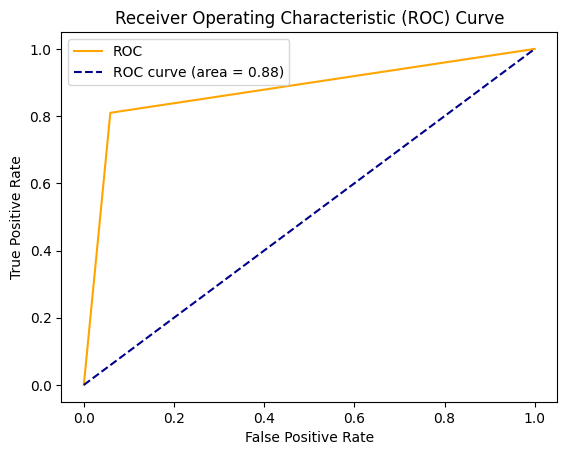

In [100]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [101]:
pip install pydotplus

In [102]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

[Text(0.7020474137931034, 0.9666666666666667, 'x[52] <= 0.056\nentropy = 0.952\nsamples = 1000\nvalue = [628, 372]'),
 Text(0.53125, 0.9, 'x[6] <= 0.03\nentropy = 0.734\nsamples = 742\nvalue = [589, 153]'),
 Text(0.3900862068965517, 0.8333333333333334, 'x[51] <= 0.511\nentropy = 0.583\nsamples = 674\nvalue = [580, 94]'),
 Text(0.24568965517241378, 0.7666666666666667, 'x[24] <= 0.04\nentropy = 0.377\nsamples = 603\nvalue = [559, 44]'),
 Text(0.22844827586206898, 0.7, 'x[55] <= 9.5\nentropy = 0.5\nsamples = 400\nvalue = [356, 44]'),
 Text(0.11206896551724138, 0.6333333333333333, 'x[4] <= 0.925\nentropy = 0.186\nsamples = 247\nvalue = [240, 7]'),
 Text(0.06896551724137931, 0.5666666666666667, 'x[54] <= 1.268\nentropy = 0.074\nsamples = 224\nvalue = [222, 2]'),
 Text(0.05172413793103448, 0.5, 'x[54] <= 1.258\nentropy = 0.134\nsamples = 107\nvalue = [105, 2]'),
 Text(0.034482758620689655, 0.43333333333333335, 'x[18] <= 4.65\nentropy = 0.077\nsamples = 106\nvalue = [105, 1]'),
 Text(0.017241

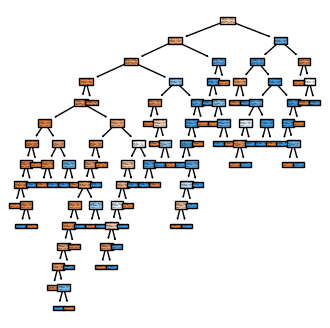

In [103]:
# To visualize the Decision tree.
from sklearn import tree
plt.figure(figsize=(4,4))
tree.plot_tree(clf,filled=True)

[Text(0.7020474137931034, 0.9666666666666667, 'x[52] <= 0.056\nentropy = 0.952\nsamples = 1000\nvalue = [628, 372]'),
 Text(0.53125, 0.9, 'x[6] <= 0.03\nentropy = 0.734\nsamples = 742\nvalue = [589, 153]'),
 Text(0.3900862068965517, 0.8333333333333334, 'x[51] <= 0.511\nentropy = 0.583\nsamples = 674\nvalue = [580, 94]'),
 Text(0.24568965517241378, 0.7666666666666667, 'x[24] <= 0.04\nentropy = 0.377\nsamples = 603\nvalue = [559, 44]'),
 Text(0.22844827586206898, 0.7, 'x[55] <= 9.5\nentropy = 0.5\nsamples = 400\nvalue = [356, 44]'),
 Text(0.11206896551724138, 0.6333333333333333, 'x[4] <= 0.925\nentropy = 0.186\nsamples = 247\nvalue = [240, 7]'),
 Text(0.06896551724137931, 0.5666666666666667, 'x[54] <= 1.268\nentropy = 0.074\nsamples = 224\nvalue = [222, 2]'),
 Text(0.05172413793103448, 0.5, 'x[54] <= 1.258\nentropy = 0.134\nsamples = 107\nvalue = [105, 2]'),
 Text(0.034482758620689655, 0.43333333333333335, 'x[18] <= 4.65\nentropy = 0.077\nsamples = 106\nvalue = [105, 1]'),
 Text(0.017241

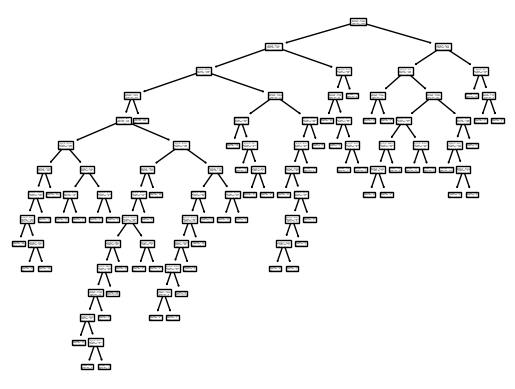

In [104]:
tree.plot_tree(clf)

# Implementing Decision with custom parameters

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=1000 , random_state= 44)

In [112]:
# Remove column names before fitting the classifier
x_train.columns = range(x_train.shape[1])

# Fit the classifier to the training data
clf.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_split=7, random_state=10)

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define and initialize the classifier
clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=20, min_samples_split=7,
                             max_features="sqrt", random_state=10)

# Convert column names to string if needed
x_test.columns = x_test.columns.astype(str)

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_hat = clf.predict(x_test)

# Calculate and print accuracy score
print("Accuracy Score is:", accuracy_score(y_test, y_hat))

# Print classification report
print(classification_report(y_test, y_hat))

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_test, y_hat)
print("Confusion Matrix:")
print(conf_mat)

# Calculate other metrics
true_positive = conf_mat[1][1]
false_negative = conf_mat[1][0]
false_positive = conf_mat[0][1]
true_negative = conf_mat[0][0]

# Classification Accuracy
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Accuracy is:", Accuracy)

# Per class Accuracy
Per_class_acc_true_pos = true_positive / (true_positive + false_negative)
print("Per_class_acc_true_pos is:", Per_class_acc_true_pos)

Per_class_acc_true_neg = true_negative / (false_positive + true_negative)
print("Per_class_acc_true_neg is:", Per_class_acc_true_neg)


Accuracy Score is: 0.874479311302416
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2160
           1       0.88      0.80      0.84      1441

    accuracy                           0.87      3601
   macro avg       0.88      0.86      0.87      3601
weighted avg       0.87      0.87      0.87      3601

Confusion Matrix:
[[1999  161]
 [ 291 1150]]
Accuracy is: 0.874479311302416
Per_class_acc_true_pos is: 0.7980569049271339
Per_class_acc_true_neg is: 0.9254629629629629


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Precision is: 0.8771929824561403
Recall is: 0.7980569049271339
F1_Score is: 0.8357558139534883
[0.         0.07453704 1.        ]
[0.        0.7980569 1.       ]


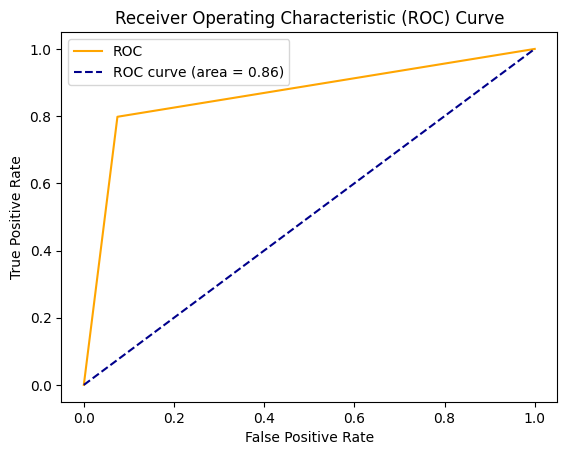

In [114]:
# Precison
Precision = true_positive/(true_positive+false_positive)
print("Precision is:",Precision)
# Recall
Recall = true_positive/(true_positive+false_negative)
print("Recall is:",Recall)
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score is:",F1_Score)
# Area Under Curve
auc = roc_auc_score(y_test, y_hat)
auc
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
print(fpr)
print(tpr)
thresholds
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Random Forest Classifier Implementation.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[[2102   58]
 [ 188 1253]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2160
           1       0.96      0.87      0.91      1441

    accuracy                           0.93      3601
   macro avg       0.94      0.92      0.93      3601
weighted avg       0.93      0.93      0.93      3601

Accuracy Score is: 0.9316856428769786
Per_Class_Accuracy_True_Positive: 0.8695350451075642
Per_Class_Accuracy_True_Negative: 0.9731481481481481
Precision is: 0.9557589626239512
Recall is: 0.8695350451075642
F1 Score is: 0.9106104651162792
[0.         0.02685185 1.        ]
[0.         0.86953505 1.        ]


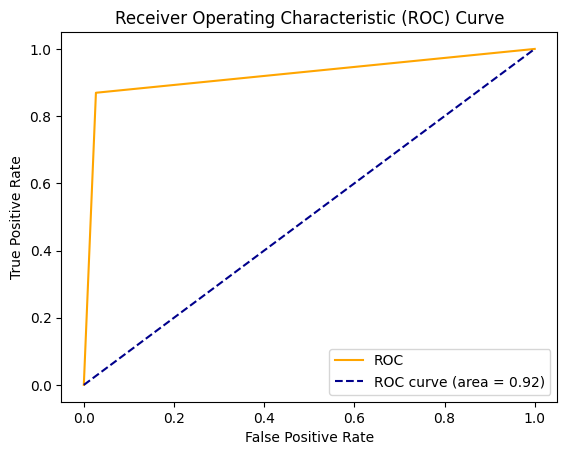

In [124]:
# Implemeting the sklearn with default n_estimators and number of features to consider.while building a
# RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=555,max_features="sqrt")
random_forest_classifier.fit(x_train, y_train)
y_pred = random_forest_classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Classification Accuracy and Accuration Report.
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

conf_mat=confusion_matrix(y_test,y_pred)
true_positive = conf_mat[1][1]
false_negative = conf_mat[1][0]
false_positive= conf_mat[0][1]
true_negative = conf_mat[0][0]

print("Accuracy Score is:",accuracy_score(y_test, y_pred))
# Per class Accuracy for true positive.
Per_class_acc_true_pos = true_positive/(true_positive+false_negative)
print("Per_Class_Accuracy_True_Positive:",Per_class_acc_true_pos)

# Per class Accuracy for true negative.
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
print("Per_Class_Accuracy_True_Negative:",Per_class_acc_true_neg)

# Precison
Precision = true_positive/(true_positive+false_positive)
print("Precision is:",Precision)

# Recall
Recall = true_positive/(true_positive+false_negative)
print("Recall is:",Recall)

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1 Score is:",F1_Score)

# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
thresholds

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[[2102   58]
 [ 188 1253]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2160
           1       0.96      0.87      0.91      1441

    accuracy                           0.93      3601
   macro avg       0.94      0.92      0.93      3601
weighted avg       0.93      0.93      0.93      3601

0.9316856428769786
Accuracy Score is: 0.9316856428769786
Per_Class_Accuracy_True_Positive: 0.8695350451075642
Per_Class_Accuracy_True_Negative: 0.9731481481481481
[0.         0.02685185 1.        ]
[0.         0.86953505 1.        ]


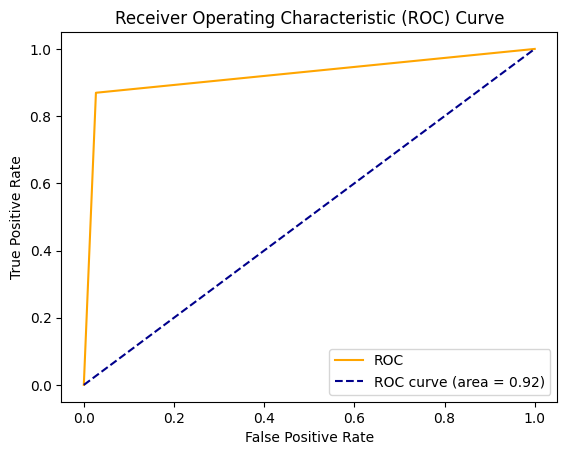

In [119]:
# Buiding a Decision tree with n_estimators=100, max_features = "sqrt"
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=555,max_features="sqrt")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
conf_mat=confusion_matrix(y_test,y_pred)
true_positive = conf_mat[1][1]
false_negative = conf_mat[1][0]
false_positive= conf_mat[0][1]
true_negative = conf_mat[0][0]

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

print("Accuracy Score is:",accuracy_score(y_test, y_pred))
# Per class Accuracy for true positive.
Per_class_acc_true_pos = true_positive/(true_positive+false_negative)
print("Per_Class_Accuracy_True_Positive:",Per_class_acc_true_pos)

# Per class Accuracy for true negative.
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
print("Per_Class_Accuracy_True_Negative:",Per_class_acc_true_neg)
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
thresholds
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Implement Grid Search CV to find out the best estimator for RandomForest Classifier.

In [125]:
param_grid = {"n_estimators": [10,50,100,500,1000,5000]}

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=1000,random_state=44)

In [134]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)

In [154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=1000,random_state=44)
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
grid_search.fit(x_train, y_train)
grid_search.best_params_

[[2102   58]
 [ 188 1253]]
Fitting 2 folds for each of 6 candidates, totalling 12 fits


{'n_estimators': 500}

# I will use the estimator returned from a Gridsearch CV algorithm.

[[2102   58]
 [ 188 1253]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2160
           1       0.96      0.87      0.91      1441

    accuracy                           0.93      3601
   macro avg       0.94      0.92      0.93      3601
weighted avg       0.93      0.93      0.93      3601

Accuracy Score is: 0.9316856428769786
Per_Class_Accuracy_True_Positive: 0.8695350451075642
Per_Class_Accuracy_True_Negative: 0.9731481481481481


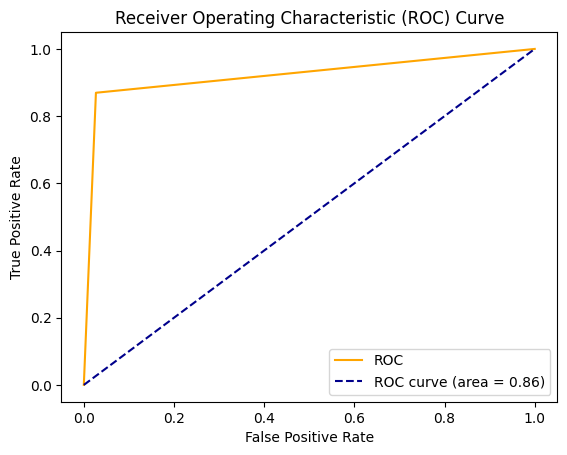

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=1000,random_state=44)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=555,max_features="sqrt")
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
true_positive = conf_mat[1][1]
false_negative = conf_mat[1][0]
false_positive= conf_mat[0][1]
true_negative = conf_mat[0][0]
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy Score is:",accuracy_score(y_test, y_pred))
# Per class Accuracy for true positive.
Per_class_acc_true_pos = true_positive/(true_positive+false_negative)
print("Per_Class_Accuracy_True_Positive:",Per_class_acc_true_pos)
# Per class Accuracy for true negative.
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
print("Per_Class_Accuracy_True_Negative:",Per_class_acc_true_neg)
# Area Under Curve
auc = roc_auc_score(y_test, y_hat)
auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
thresholds
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()